#Importing necessary libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


#Loading the Dataset

In [42]:
train_df = pd.read_csv("/content/train.csv")

#Inspecting the Dataset

In [43]:
# Display the first few rows of the training dataset
print(train_df.head())

   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [44]:
# Check the structure of the dataset
print(train_df.info())

# Summary statistics of the numerical columns
print("\nSummary:\n", train_df.describe())

# unique values
print("\nUnique values in each column:\n", train_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB
None

Summary:
             sl_no      gender       ssc_p       hsc

#DATA PREPROCESSING

#Checking for Missing Values

In [45]:
print(train_df.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [46]:
# Drop the 'salary' and 'sl_no' columns as they're not needed for prediction
train_df = train_df.drop(columns=['salary', 'sl_no'])


The 'salary' column contains a significant number of missing values (67 out of 215 entries), and is not required for predicting the placement status since it is an outcome of being placed, not a contributing factor. Additionally, imputation might introduce bias.

The 'sl_no' column is merely an identifier with no predictive value, so it was also removed to streamline the dataset. These steps ensure that our model focuses on relevant features, improving its efficiency and accuracy.

#Visualizing the Distribution of Numerical Features

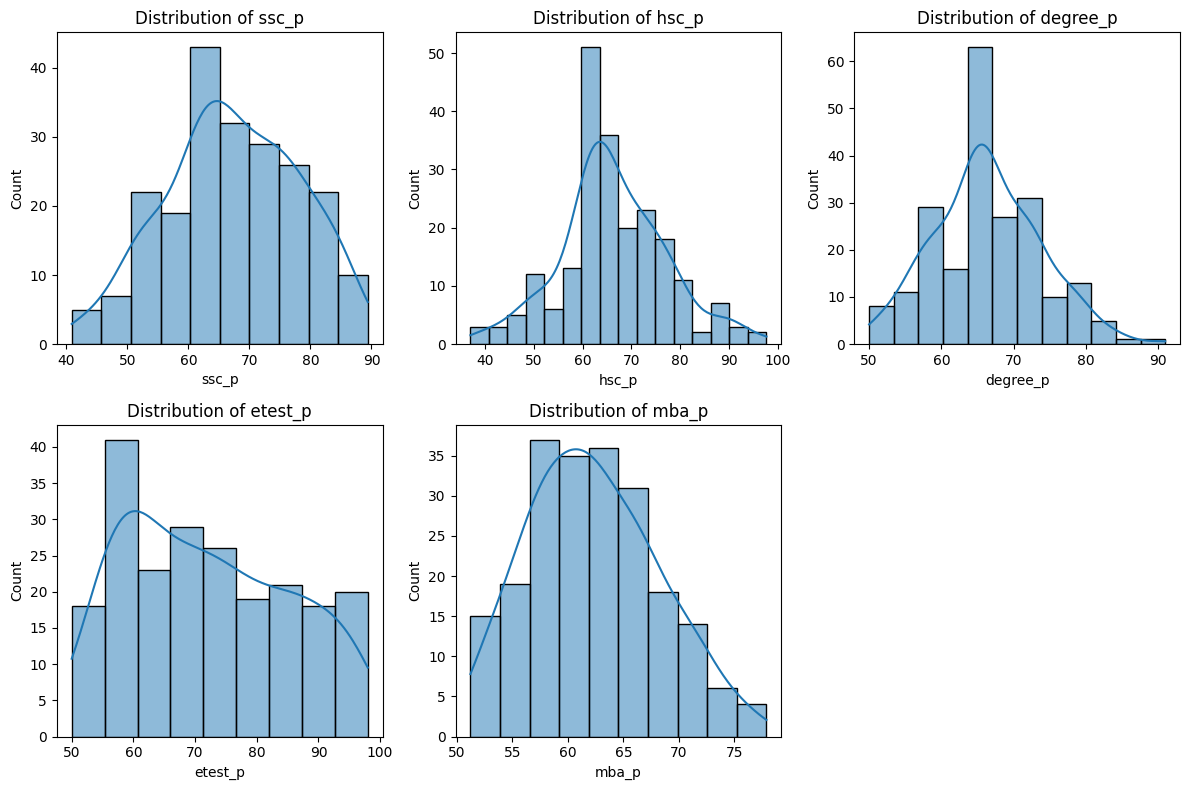

In [47]:
# Plot histograms for numerical features
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()



Based on the histograms of the numerical features in the dataset, we observe that the distributions of educational percentages, including secondary education percentage (`ssc_p`), higher secondary education percentage (`hsc_p`), and degree percentage (`degree_p`), exhibit similar patterns. Most students' scores cluster around the middle ranges, with `ssc_p` centered around 60-70%, peaking at approximately 65%, `hsc_p` between 60-70%, peaking around 60%, and `degree_p` around 65-75%, peaking at 65%. The employability test percentage (`etest_p`) has sparse data, with values mostly around 60%, and lacks a clear pattern due to limited data points. These insights from the histograms provide an understanding of the distribution of key features in the dataset.

#Visualizing Categorical Features

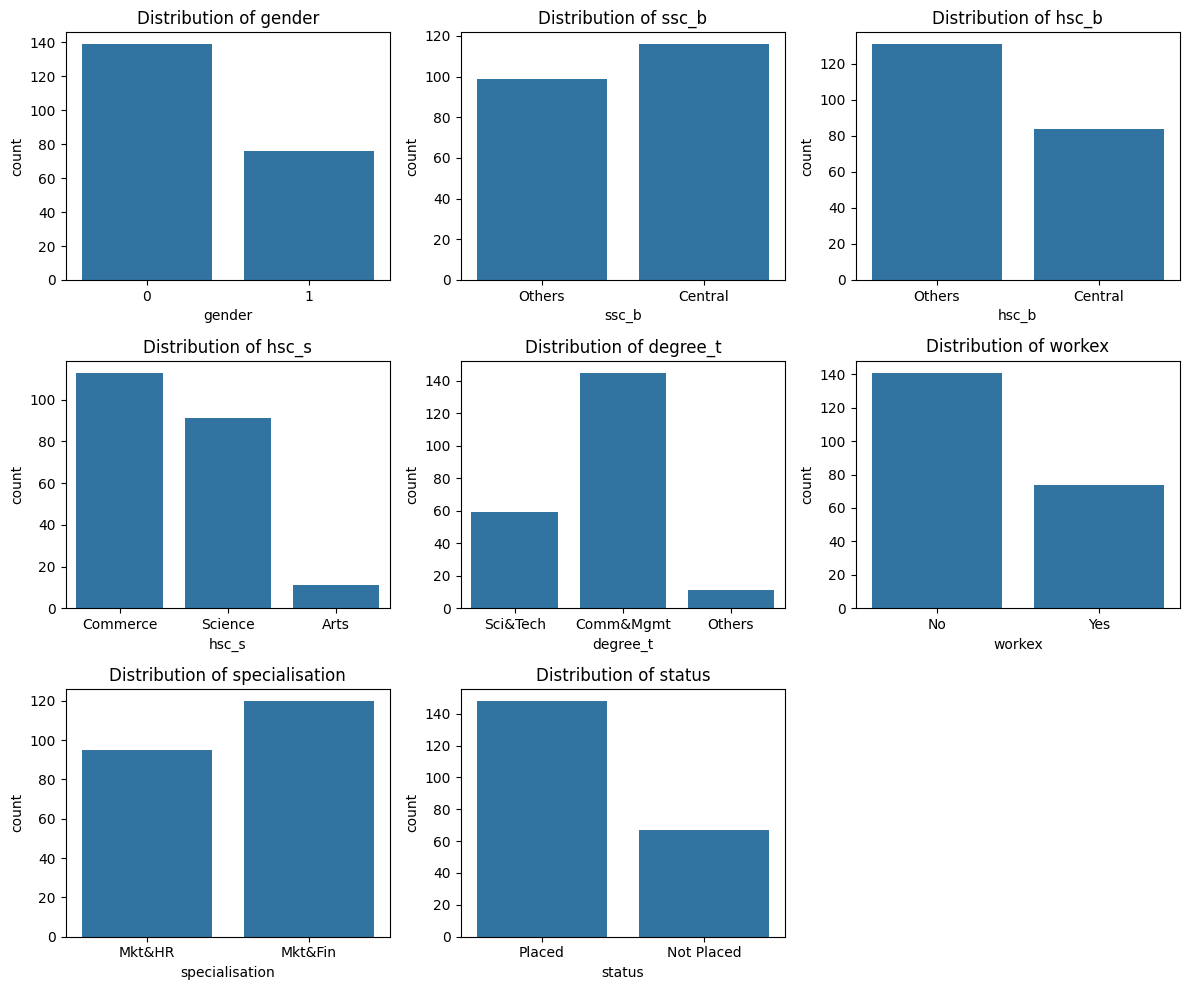

In [48]:
# Plot bar plots for categorical features
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


The bar charts illustrate the distribution of various categorical features in the dataset. The gender distribution shows more females than males. For the SSC board, students are fairly evenly split between 'Others' and 'Central' boards, while for the HSC board, 'Others' has a higher count. The majority of students specialized in Commerce in higher secondary education, followed by Science and Arts. In terms of degree types, Commerce and Management has the highest representation, followed by Science and Technology, with 'Others' being the least common. Most students lack work experience. Specializations in MBA are almost evenly split between Marketing & HR and Marketing & Finance, with a slight preference for the latter. Finally, the placement status indicates that more students were placed than not placed.

#Visualizing the Target Variable

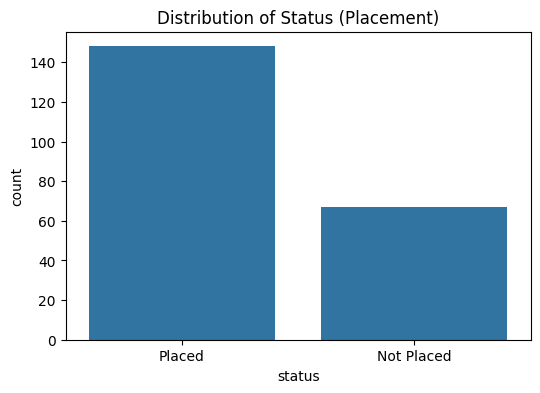

In [49]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=train_df)
plt.title('Distribution of Status (Placement)')
plt.show()


As mentioned above, The bar chart for the distribution of the target variable "status" (placement) shows that the number of placed students is significantly greater, indicating a positive skew towards placement in the dataset. This distribution is crucial for understanding the balance of the target variable, which is an important aspect for training effective predictive models.

#Encoding categorical features

In [50]:
# Columns to be label encoded (binary categorical variables)
binary_columns = ['ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()

for column in binary_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])

# Columns to be one-hot encoded (non-ordinal categorical variables)
one_hot_columns = ['hsc_s', 'degree_t']

# Apply one-hot encoding
train_df = pd.get_dummies(train_df, columns=one_hot_columns)

# Display the encoded dataframe
print(train_df.head())


   gender  ssc_p  ssc_b  hsc_p  hsc_b  degree_p  workex  etest_p  \
0       0  67.00      1  91.00      1     58.00       0     55.0   
1       0  79.33      0  78.33      1     77.48       1     86.5   
2       0  65.00      0  68.00      0     64.00       0     75.0   
3       0  56.00      0  52.00      0     52.00       0     66.0   
4       0  85.80      0  73.60      0     73.30       0     96.8   

   specialisation  mba_p  status  hsc_s_Arts  hsc_s_Commerce  hsc_s_Science  \
0               1  58.80       1       False            True          False   
1               0  66.28       1       False           False           True   
2               0  57.80       1        True           False          False   
3               1  59.43       0       False           False           True   
4               0  55.50       1       False            True          False   

   degree_t_Comm&Mgmt  degree_t_Others  degree_t_Sci&Tech  
0               False            False               Tru

In [51]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              215 non-null    int64  
 1   ssc_p               215 non-null    float64
 2   ssc_b               215 non-null    int64  
 3   hsc_p               215 non-null    float64
 4   hsc_b               215 non-null    int64  
 5   degree_p            215 non-null    float64
 6   workex              215 non-null    int64  
 7   etest_p             215 non-null    float64
 8   specialisation      215 non-null    int64  
 9   mba_p               215 non-null    float64
 10  status              215 non-null    int64  
 11  hsc_s_Arts          215 non-null    bool   
 12  hsc_s_Commerce      215 non-null    bool   
 13  hsc_s_Science       215 non-null    bool   
 14  degree_t_Comm&Mgmt  215 non-null    bool   
 15  degree_t_Others     215 non-null    bool   
 16  degree_t

#Correlation Analysis

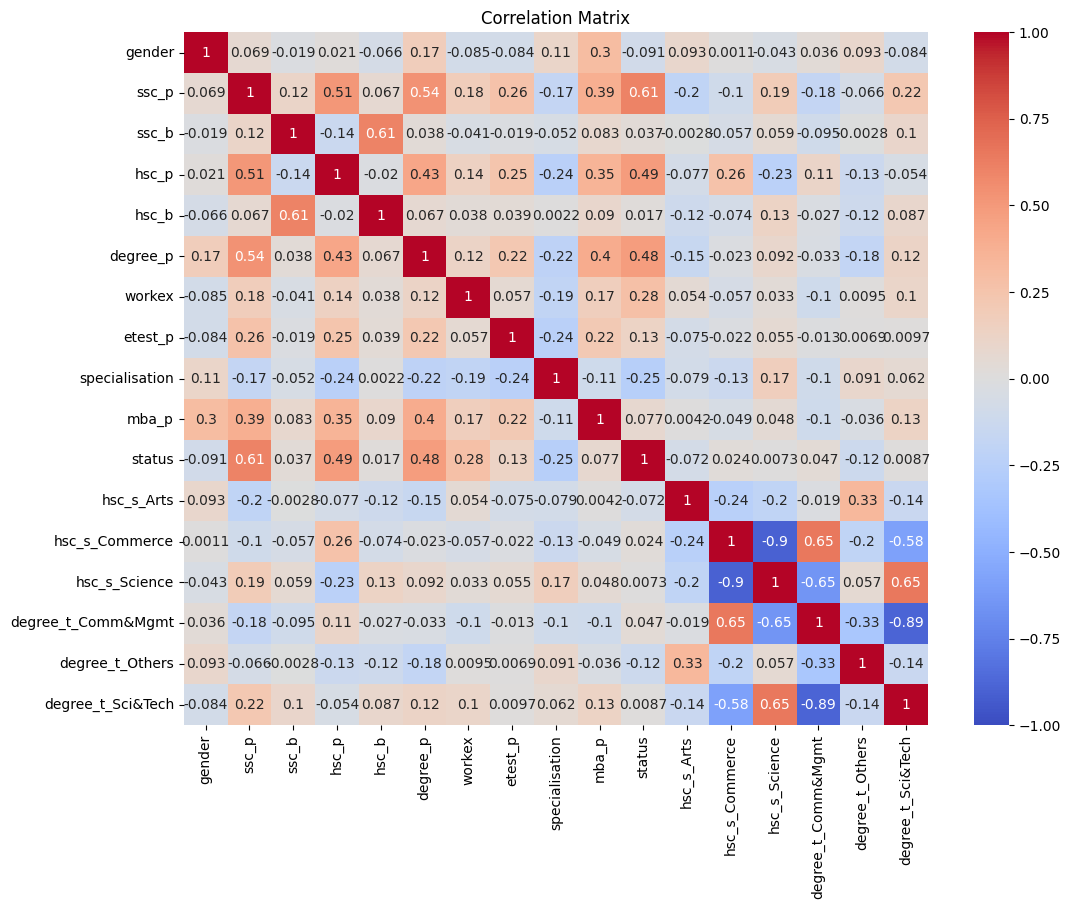

In [52]:
# Calculating the correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#Pair Plot

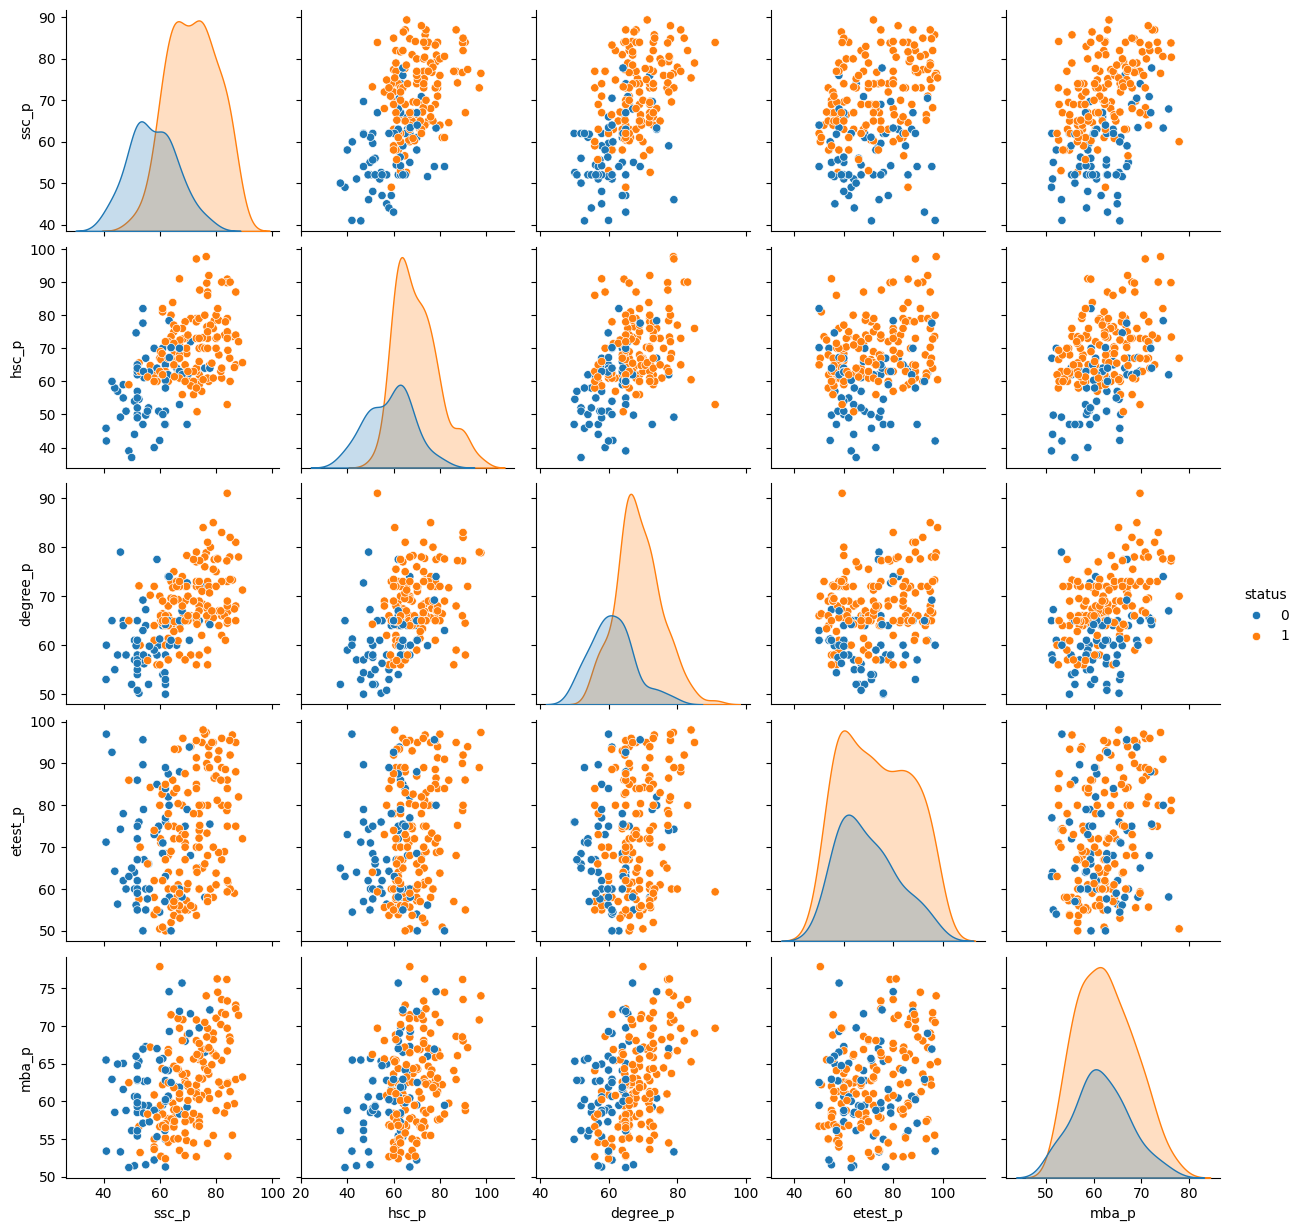

In [53]:
sns.pairplot(train_df, hue='status', vars=['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'])
plt.show()

#Splitting the Data

In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = train_df.drop(columns=['status'])
y = train_df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [55]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#MODEL SELECTION

In [56]:
models = {
    'logreg': LogisticRegression(),
    'dtree': DecisionTreeClassifier(),
    'rf': RandomForestClassifier()
}


In [57]:
# Hyperparameter tuning using GridSearchCV
param_grid_logreg = {'C': [0.1, 1, 10]}
param_grid_dtree = {'max_depth': [None, 10, 20, 30]}
param_grid_rf = {'n_estimators': [100, 200, 300]}

#MODEL TRAINING

In [58]:
# GridSearchCV for Logistic Regression
grid_logreg = GridSearchCV(models['logreg'], param_grid_logreg, cv=5) # Extract LogisticRegression from models dictionary.
grid_logreg.fit(X_train_scaled, y_train)
best_logreg = grid_logreg.best_estimator_

In [59]:
# GridSearchCV for Decision Tree
grid_dtree = GridSearchCV(models['dtree'], param_grid_dtree, cv=5) # Extract dtree
grid_dtree.fit(X_train_scaled, y_train)
best_dtree = grid_dtree.best_estimator_

In [60]:
# GridSearchCV for Random Forest
grid_rf = GridSearchCV(models['rf'], param_grid_rf, cv=5) # Extract rf
grid_rf.fit(X_train_scaled, y_train)
best_rf = grid_rf.best_estimator_

In [61]:
# Print best parameters found by GridSearchCV
print("Best parameters for Logistic Regression:", grid_logreg.best_params_)
print("Best parameters for Decision Tree:", grid_dtree.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Logistic Regression: {'C': 1}
Best parameters for Decision Tree: {'max_depth': 20}
Best parameters for Random Forest: {'n_estimators': 200}


#MODEL EVALUATION

In [62]:
# Evaluate models

def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix



In [63]:
# Evaluate Logistic Regression
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, conf_matrix_logreg = evaluate_model(best_logreg, X_test_scaled, y_test)
print("Logistic Regression:")
print(f'Accuracy: {accuracy_logreg}')
print(f'Precision: {precision_logreg}')
print(f'Recall: {recall_logreg}')
print(f'F1 Score: {f1_logreg}')
print('Confusion Matrix:')
print(conf_matrix_logreg)
print('----------------------------------------')

Logistic Regression:
Accuracy: 0.8307692307692308
Precision: 0.8367346938775511
Recall: 0.9318181818181818
F1 Score: 0.8817204301075268
Confusion Matrix:
[[13  8]
 [ 3 41]]
----------------------------------------


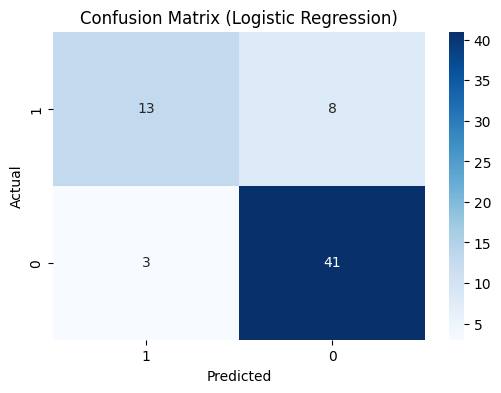

In [64]:
# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, cmap='Blues', fmt='g', xticklabels=train_df['status'].unique(), yticklabels=train_df['status'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


In [65]:
# Evaluate Decision Tree
accuracy_dtree, precision_dtree, recall_dtree, f1_dtree, conf_matrix_dtree = evaluate_model(best_dtree, X_test_scaled, y_test)
print("Decision Tree:")
print(f'Accuracy: {accuracy_dtree}')
print(f'Precision: {precision_dtree}')
print(f'Recall: {recall_dtree}')
print(f'F1 Score: {f1_dtree}')
print('Confusion Matrix:')
print(conf_matrix_dtree)
print('----------------------------------------')

Decision Tree:
Accuracy: 0.8153846153846154
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1 Score: 0.8695652173913043
Confusion Matrix:
[[13  8]
 [ 4 40]]
----------------------------------------


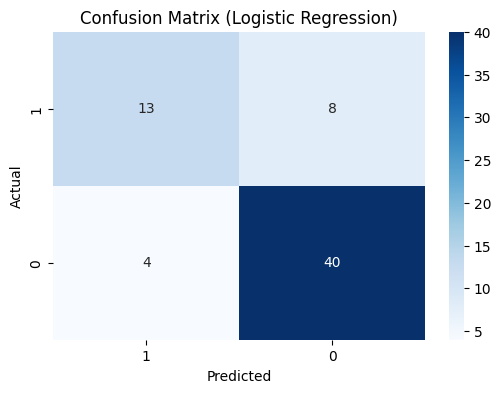

In [66]:
# Plot the confusion matrix for decision tree
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dtree, annot=True, cmap='Blues', fmt='g', xticklabels=train_df['status'].unique(), yticklabels=train_df['status'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [67]:
# Evaluate Random Forest
accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix_rf = evaluate_model(best_rf, X_test_scaled, y_test)
print("Random Forest:")
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('----------------------------------------')

Random Forest:
Accuracy: 0.7846153846153846
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1 Score: 0.8571428571428572
Confusion Matrix:
[[ 9 12]
 [ 2 42]]
----------------------------------------


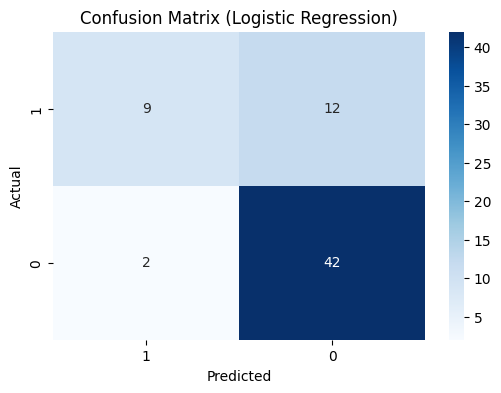

In [68]:

# Plot the confusion matrix for random forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', xticklabels=train_df['status'].unique(), yticklabels=train_df['status'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


In [69]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_logreg, accuracy_dtree, accuracy_rf],
    'Precision': [precision_logreg, precision_dtree, precision_rf],
    'Recall': [recall_logreg, recall_dtree, recall_rf],
    'F1 Score': [f1_logreg, f1_dtree, f1_rf]
})

# Display the results table
print(results_df.to_string())


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.830769   0.836735  0.931818  0.881720
1        Decision Tree  0.815385   0.833333  0.909091  0.869565
2        Random Forest  0.784615   0.777778  0.954545  0.857143


# VOTING CLASSIFIER

In [70]:
# Create a voting classifier combining all models
voting_clf = VotingClassifier(estimators=[
    ('logreg', best_logreg),
    ('dtree', best_dtree),
    ('rf', best_rf)
], voting='hard')

In [71]:
# Train the voting classifier
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)

In [72]:
from sklearn.metrics import f1_score
# Evaluate the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, pos_label=1)
recall_voting = recall_score(y_test, y_pred_voting, pos_label=1)
f1_voting = f1_score(y_test, y_pred_voting, pos_label=1)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

In [73]:
print('Voting Classifier:')
print(f'Accuracy: {accuracy_voting}')
print(f'Precision: {precision_voting}')
print(f'Recall: {recall_voting}')
print(f'F1 Score: {f1_voting}')
print('Confusion Matrix:')
print(conf_matrix_voting)

Voting Classifier:
Accuracy: 0.8153846153846154
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1 Score: 0.875
Confusion Matrix:
[[11 10]
 [ 2 42]]


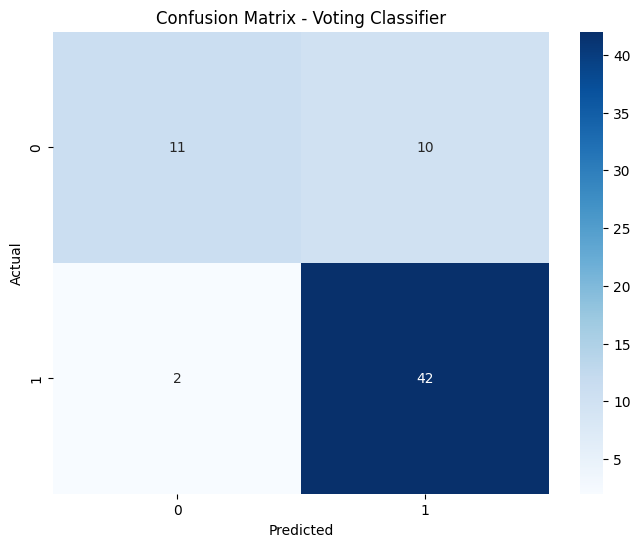

In [74]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Voting Classifier'],
    'Accuracy': [accuracy_logreg, accuracy_dtree, accuracy_rf, accuracy_voting],
    'Precision': [precision_logreg, precision_dtree, precision_rf, precision_voting],
    'Recall': [recall_logreg, recall_dtree, recall_rf, recall_voting],
    'F1 Score': [f1_logreg, f1_dtree, f1_rf, f1_voting]
})

# Display the results table
print(results_df.to_string())

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.830769   0.836735  0.931818  0.881720
1        Decision Tree  0.815385   0.833333  0.909091  0.869565
2        Random Forest  0.784615   0.777778  0.954545  0.857143
3    Voting Classifier  0.815385   0.807692  0.954545  0.875000


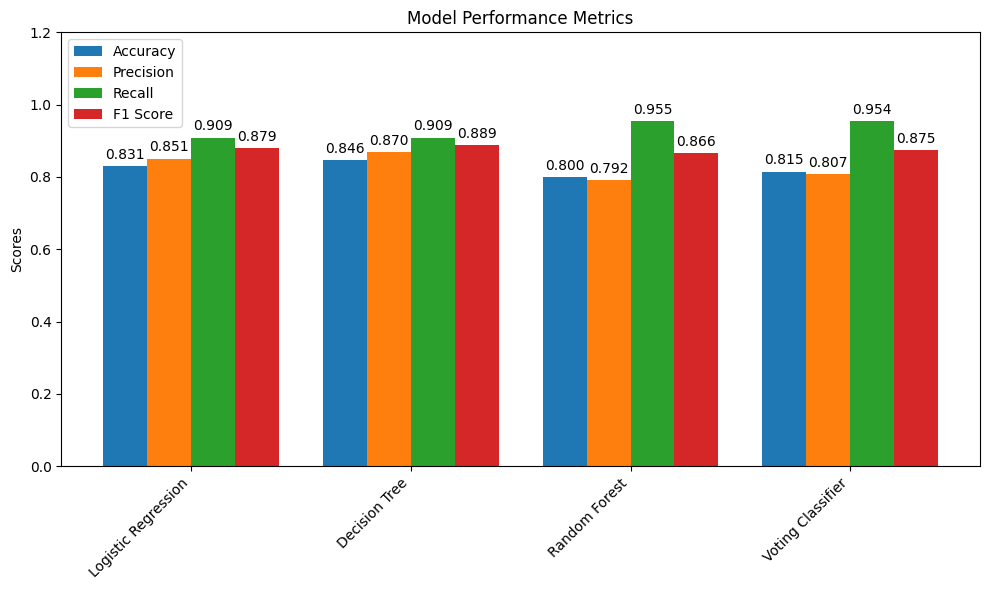

In [76]:
# Metrics data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Voting Classifier']
accuracy = [0.831, 0.846, 0.800, 0.815]
precision = [0.851, 0.870, 0.792, 0.807]
recall = [0.909, 0.909, 0.955, 0.954]
f1_score = [0.879, 0.889, 0.866, 0.875]


x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1_score, width, label='F1 Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Add data labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.ylim(0, 1.2)  # Adjust y-axis limits if needed
plt.tight_layout()
plt.show()